In [1]:
from pathlib import Path
import re
import numpy as np
import json
import matplotlib.pyplot as plt

# Frame

In [4]:
frame_train_loss_arr = []
frame_train_acc_arr = []

frame_val_loss_arr = []
frame_val_acc_arr = []

frame_test_loss_arr = []
frame_test_acc_arr = []

frame_results_paths = list(Path('Models/Frame/VGG16').glob('*/VGG16_result.txt'))
frame_results_paths = [frame_results_paths[i] for i in [0, 2]]
for res in frame_results_paths:
    with open(res, 'r') as res_file:
        lines = res_file.read()

        regex_res = re.search(r'Train loss: (.+)', lines)
        frame_train_loss_arr.append(np.array(json.loads(regex_res[1])))

        regex_res = re.search(r'val_loss: (.+)', lines)
        frame_val_loss_arr.append(np.array(json.loads(regex_res[1])))

        regex_res = re.search(r'Train accuracy: (.+)', lines)
        frame_train_acc_arr.append(np.array(json.loads(regex_res[1])))

        regex_res = re.search(r'Train val_accuracy: (.+)', lines)
        frame_val_acc_arr.append(np.array(json.loads(regex_res[1])))

        regex_res = re.search(r'Test loss: (.+)', lines)
        frame_test_loss_arr.append(json.loads(regex_res[1]))

        regex_res = re.search(r'Test accuracy: (.+)', lines)
        frame_test_acc_arr.append(json.loads(regex_res[1]))

In [27]:
frame_models_len = len(frame_results_paths)
# frame_models_label = [f'dist_{i + 1}' for i in range(frame_models_len)]
frame_models_label = ['VGG16', 'VGG16 Drop 0.5']

In [28]:
frame_max_epochs = max([len(m) for m in frame_train_loss_arr])

In [29]:
plt_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [30]:
def draw_comp_plots(iter_n, ar_1, labels_1, line='-', label_type=None):

    lab = ''
    for idx in range(iter_n):
        match label_type:
            case 'last':
                lab = f'- last: ({ar_1[idx][-1]:.2f})'
            case 'max':
                lab = f'- max: ({max(ar_1[idx]):.2f})'
            case 'min':
                lab = f'- min: ({min(ar_1[idx]):.2f})'
            case 'avg':
                lab = f'- sum: ({(sum(ar_1[idx])/len(ar_1[idx])):.2f})'

        c_ax.plot(
            range(len(ar_1[idx])),
            ar_1[idx],
            color=plt_colors[idx],
            linestyle=line,
            label=f'{labels_1[idx]} {lab}'
        )

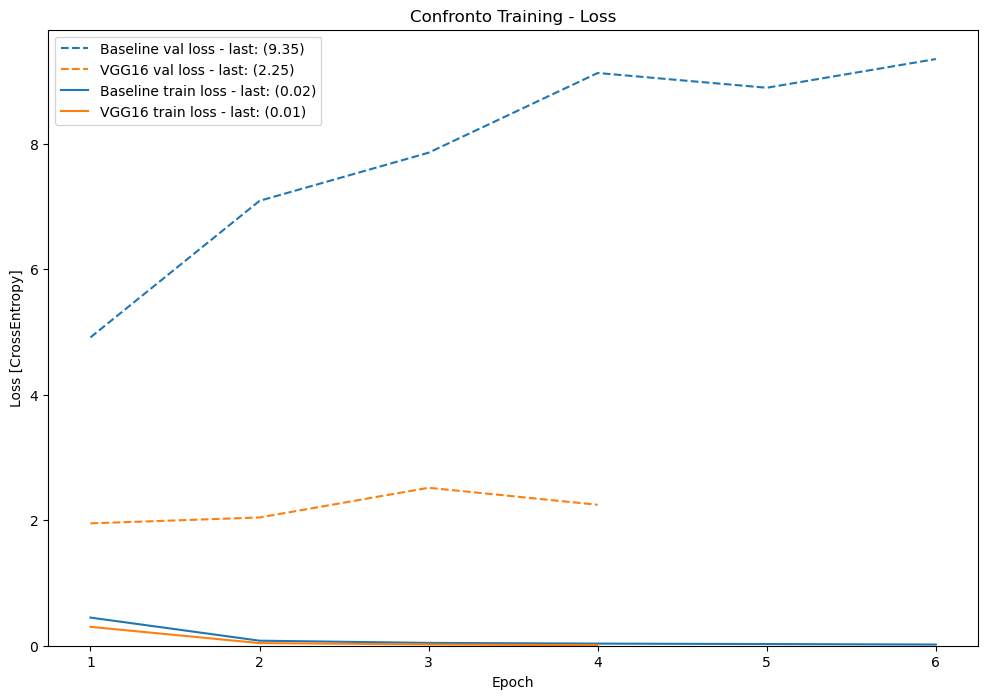

In [31]:
fig, c_ax = plt.subplots(1, 1, figsize=(12, 8))
labels_1 = [f'{i} train loss' for i in frame_models_label]
labels_2 = [f'{i} val loss' for i in frame_models_label]
draw_comp_plots(frame_models_len, frame_val_loss_arr, labels_2, line='--', label_type='last')
draw_comp_plots(frame_models_len, frame_train_loss_arr, labels_1, label_type='last')

c_ax.legend()
c_ax.set_ylim([0, max(c_ax.get_ylim())])
c_ax.set_xlabel('Epoch')
c_ax.set_ylabel('Loss [CrossEntropy]')
c_ax.set_xticks(range(frame_max_epochs), [i+1 for i in range(frame_max_epochs)])
c_ax.set_title('Confronto Training - Loss')
plt.show()

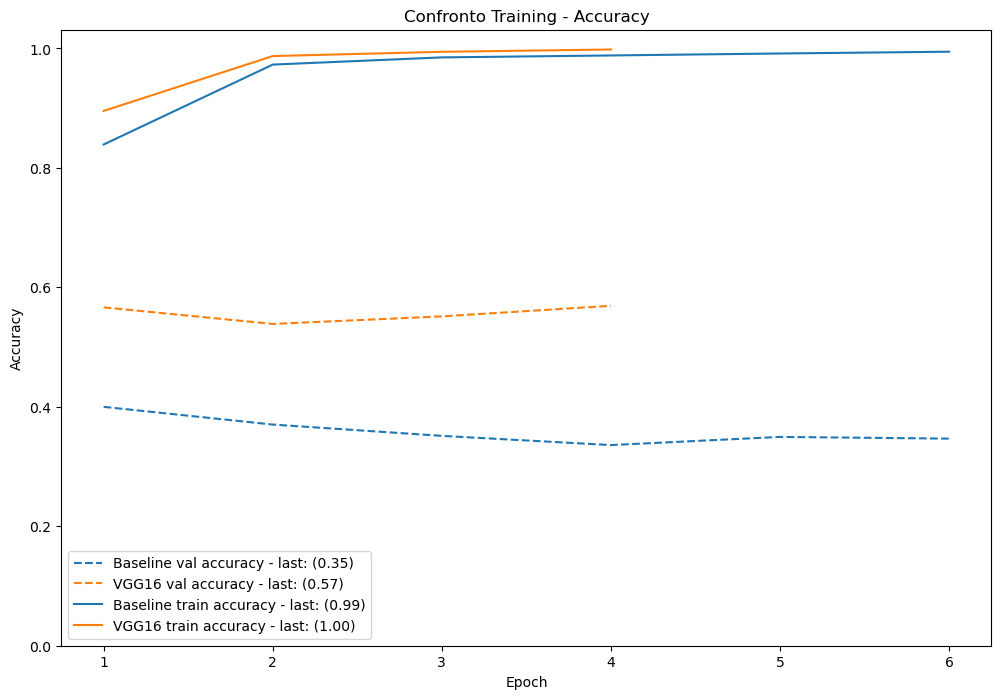

In [32]:
fig, c_ax = plt.subplots(1, 1, figsize=(12, 8))
labels_1 = [f'{i} train accuracy' for i in frame_models_label]
labels_2 = [f'{i} val accuracy' for i in frame_models_label]


draw_comp_plots(frame_models_len, frame_val_acc_arr, labels_2, line='--', label_type='last')
draw_comp_plots(frame_models_len, frame_train_acc_arr, labels_1, label_type='last')

c_ax.legend()
c_ax.set_ylim([0, max(c_ax.get_ylim())])
c_ax.set_xlabel('Epoch')
c_ax.set_ylabel('Accuracy')
c_ax.set_xticks(range(frame_max_epochs), [i+1 for i in range(frame_max_epochs)])
c_ax.set_title('Confronto Training - Accuracy')
plt.show()

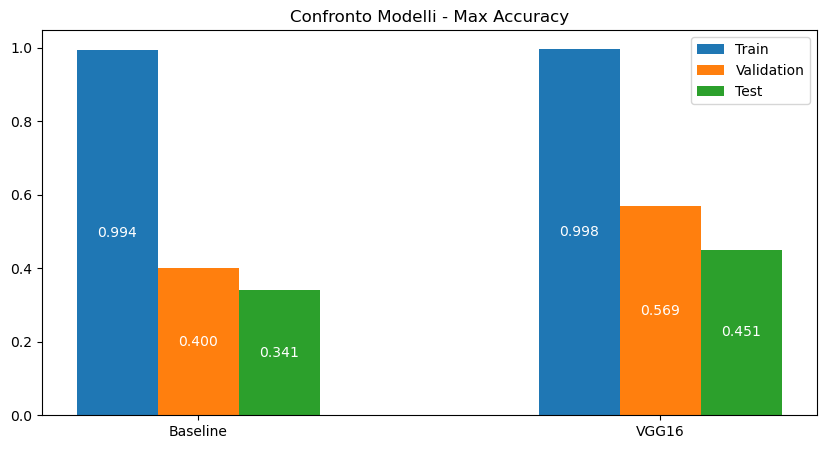

In [33]:
x = np.arange(len(frame_models_label))
bar_width = 0.35

frame_max_train_acc = [max(i) for i in frame_train_acc_arr]
frame_max_val_acc = [max(i) for i in frame_val_acc_arr]


fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(2 * x - bar_width, frame_max_train_acc, bar_width)
rects2 = ax.bar(2 * x, frame_max_val_acc, bar_width)
rects3 = ax.bar(2 * x + bar_width, frame_test_acc_arr, bar_width)
ax.set_xticks(2 * x)
ax.set_xticklabels(frame_models_label)
ax.bar_label(rects1, label_type='center', color='white', fmt='%.3f')
ax.bar_label(rects2, label_type='center', color='white', fmt='%.3f')
ax.bar_label(rects3, label_type='center', color='white', fmt='%.3f')
ax.set_title('Confronto Modelli - Max Accuracy')
ax.legend(['Train', 'Validation', 'Test'])
plt.show()

# Flows

In [98]:
flow_train_loss_arr = []
flow_train_acc_arr = []

flow_val_loss_arr = []
flow_val_acc_arr = []

flow_test_loss_arr = []
flow_test_acc_arr = []

In [99]:
flow_results_paths = list(Path('Models/Flow/baseline_model').glob('*/baseline_model_result.txt'))

for res in flow_results_paths:
    with open(res, 'r') as res_file:
        lines = res_file.read()

        regex_res = re.search(r'Train loss: (.+)', lines)
        flow_train_loss_arr.append(np.array(json.loads(regex_res[1])))

        regex_res = re.search(r'val_loss: (.+)', lines)
        flow_val_loss_arr.append(np.array(json.loads(regex_res[1])))

        regex_res = re.search(r'Train accuracy: (.+)', lines)
        flow_train_acc_arr.append(np.array(json.loads(regex_res[1])))

        regex_res = re.search(r'Train val_accuracy: (.+)', lines)
        flow_val_acc_arr.append(np.array(json.loads(regex_res[1])))

        regex_res = re.search(r'Test loss: (.+)', lines)
        flow_test_loss_arr.append(json.loads(regex_res[1]))

        regex_res = re.search(r'Test accuracy: (.+)', lines)
        flow_test_acc_arr.append(json.loads(regex_res[1]))

In [100]:
flow_models_len = len(flow_results_paths)
flow_models_label = [f'dist_{i + 1}' for i in range(flow_models_len)]

In [101]:
flow_max_epochs = max([len(m) for m in flow_train_loss_arr])

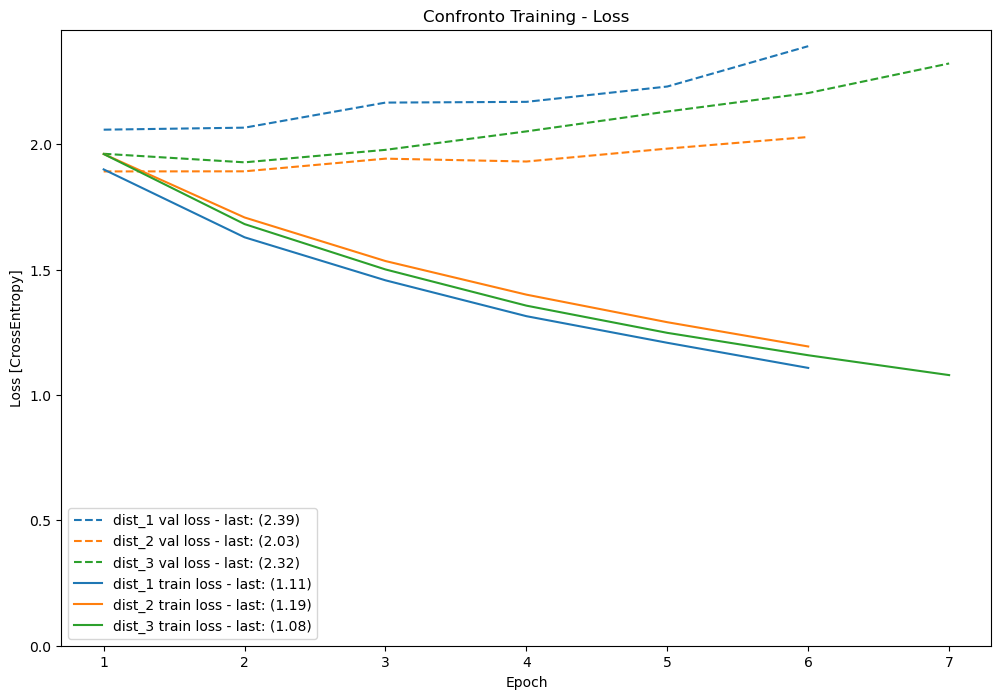

In [102]:
fig, c_ax = plt.subplots(1, 1, figsize=(12, 8))
labels_1 = [f'{i} train loss' for i in flow_models_label]
labels_2 = [f'{i} val loss' for i in flow_models_label]


draw_comp_plots(flow_models_len, flow_val_loss_arr, labels_2, line='--', label_type='last')
draw_comp_plots(flow_models_len, flow_train_loss_arr, labels_1, label_type='last')

c_ax.legend()
c_ax.set_ylim([0, max(c_ax.get_ylim())])
c_ax.set_xlabel('Epoch')
c_ax.set_ylabel('Loss [CrossEntropy]')
c_ax.set_xticks(range(flow_max_epochs), [i+1 for i in range(flow_max_epochs)])
c_ax.set_title('Confronto Training - Loss')
plt.show()

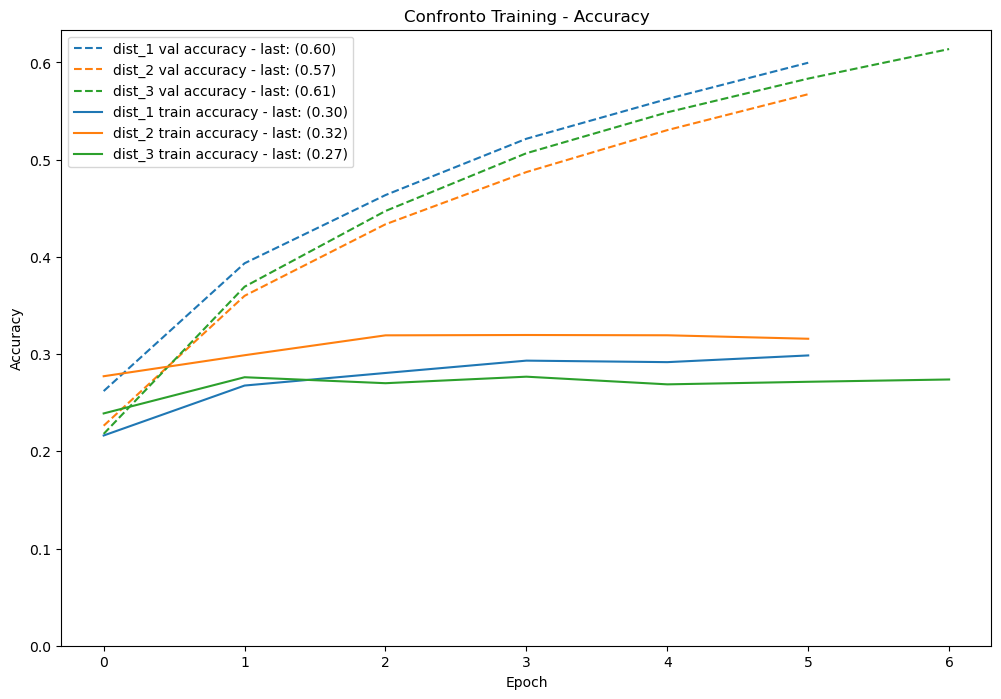

In [103]:
fig, c_ax = plt.subplots(1, 1, figsize=(12, 8))
labels_1 = [f'{i} train accuracy' for i in flow_models_label]
labels_2 = [f'{i} val accuracy' for i in flow_models_label]

draw_comp_plots(flow_models_len, flow_train_acc_arr, labels_2, line='--', label_type='last')
draw_comp_plots(flow_models_len, flow_val_acc_arr, labels_1, label_type='last')

c_ax.legend()
c_ax.set_ylim([0, max(c_ax.get_ylim())])
c_ax.set_xlabel('Epoch')
c_ax.set_ylabel('Accuracy')
c_ax.set_title('Confronto Training - Accuracy')
plt.show()

In [104]:
flow_train_acc_arr

[array([0.26192752, 0.3933917 , 0.46353778, 0.52146506, 0.56236368,
        0.59966242]),
 array([0.2262924 , 0.35990223, 0.43350616, 0.4872019 , 0.53035104,
        0.56729376]),
 array([0.2178895 , 0.36927822, 0.44716296, 0.50658602, 0.54865003,
        0.58335322, 0.61373526])]

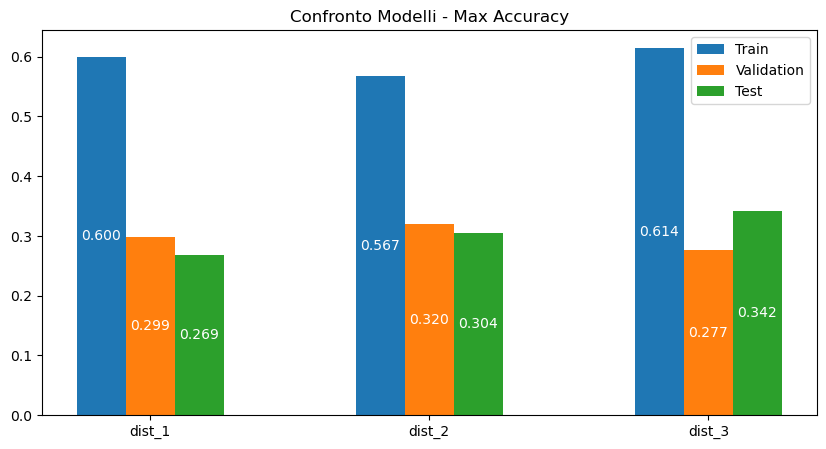

In [105]:
labels = flow_models_label
x = np.arange(len(labels))
bar_width = 0.35

flow_max_train_acc = [max(i) for i in flow_train_acc_arr]
flow_max_val_acc = [max(i) for i in flow_val_acc_arr]


fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(2 * x - bar_width, flow_max_train_acc, bar_width)
rects2 = ax.bar(2 * x, flow_max_val_acc, bar_width)
rects3 = ax.bar(2 * x + bar_width, flow_test_acc_arr, bar_width)
ax.set_xticks(2 * x)
ax.set_xticklabels(labels)
ax.bar_label(rects1, label_type='center', color='white', fmt='%.3f')
ax.bar_label(rects2, label_type='center', color='white', fmt='%.3f')
ax.bar_label(rects3, label_type='center', color='white', fmt='%.3f')
ax.legend(['Train', 'Validation', 'Test'])
ax.set_title('Confronto Modelli - Max Accuracy')
plt.show()